<a href="https://colab.research.google.com/github/Hanishkaa01/DEEP-LEARNING-TECHNIQUES-LAB-EXP/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0973 - val_loss: 0.0379
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0348 - val_loss: 0.0259
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0250 - val_loss: 0.0217
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0214 - val_loss: 0.0191
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0189 - val_loss: 0.0173
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0161 - val_loss: 0.0154
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0152 - val_loss: 0.0141
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0144 - val_loss: 0.0136
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0138 - val_loss: 0.0130
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0133 - val_los

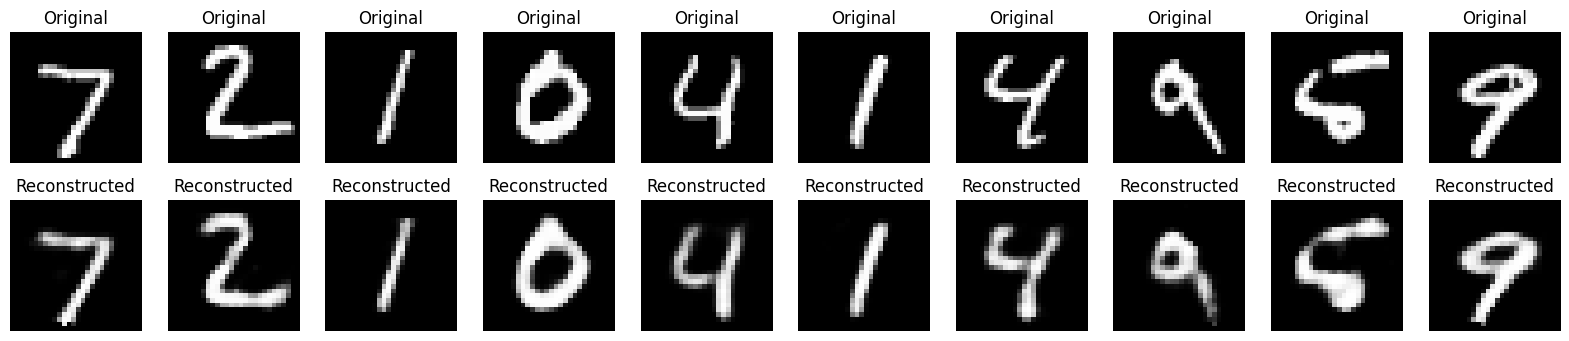

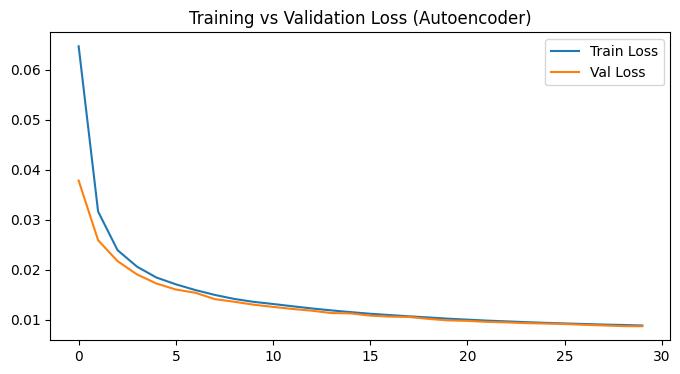

Original image size: 784 dimensions
Compressed (latent) size: 32 dimensions
Compression ratio: 24.50x


In [1]:

# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# Step 2: Load and Normalize MNIST Data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images (28x28 → 784)
x_train_flat = x_train.reshape((len(x_train), 784))
x_test_flat = x_test.reshape((len(x_test), 784))

# Step 3: Define Autoencoder Architecture
encoding_dim = 32  # compression size (latent space dimension)

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # output between 0–1

# Full Autoencoder Model
autoencoder = Model(input_img, decoded)

# Encoder model (for visualization)
encoder = Model(input_img, encoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the Autoencoder
history = autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat),
    verbose=1
)

# Step 5: Compress and Reconstruct Test Images
encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = autoencoder.predict(x_test_flat)

# Step 6: Visualize Original vs Reconstructed Images
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# Step 7: Plot Training and Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss (Autoencoder)')
plt.legend()
plt.show()

# Step 8: Display Compression Info
print(f"Original image size: 784 dimensions")
print(f"Compressed (latent) size: {encoding_dim} dimensions")
print(f"Compression ratio: {784/encoding_dim:.2f}x")
